### Title: Named Entiy Recognition
##### Author: Amo
<strong>email:</strong> kwaby.dad@gmail.com

### 1. Introduction:
Usually, a piece of text document is full of references to people, places, organizations and other entities (NOTE that entities can include such things as currency, numbers etc in addition to the ones we include in our little demo here). We want to be able to automatically retrieve this information. Perhaps we can then ask why some entites are referenced more times than others.  
<br>
<br><strong>Goal: </strong>Find and extract all references sto people, places and organizations withing the text<br> 

- we start with a simple text preprocesing
- generate a spacy doc with Named Entity recognition engine on
- extract the entities using the extract_entities function in textacy
- create a pandas dataframe and do simple frequency counts
- finish with a nice visualization of the result

<strong>NOTE</strong>: In practice you'll do more than these few simple steps.


In [20]:
#imports

# *** NLP tools
import textacy
from gensim.summarization.summarizer import summarize



# *** Misc tools
from collections import Counter
import string 
import pandas as pd
import seaborn as sns

### 2 Get data
<strong> Data Description:</strong>
* The data used in this project comes from the WHO website and is a news release regarding the progress on war against ebola
* source:  https://www.unenvironment.org/news-and-stories/editorial/facing-our-global-environmental-challenges-requires-efficient

In [7]:
# load data
with open('UNEnvironment_gloabl_challenges.txt','r') as inf:
    raw_text = inf.readlines()
    
    
# preview what's in the first few lines of the file

raw_text[:5]

['## Source: https://www.unenvironment.org/news-and-stories/editorial/facing-our-global-environmental-challenges-requires-efficient\n',
 '## title: Facing our global environmental challenges requires efficient international cooperation\n',
 '\n',
 'The changes we need are huge—time is short\n',
 '\n']

### 2. Preprocessing
<strong>Goal:</strong> Clean data of unwanted text.
- remove the first two lines: source url and title respectively

In [21]:
raw_text =raw_text[3:]                        
raw_text = ''.join(raw_text).replace('\n','')  # replace '\n' 

In [14]:
#raw_text

### 3. References to places,people,etc in the data
We are interested in the following entities:
- People (PERSON)
- Organizations (ORG)
- Geopolitical Entities, usually countries (GPE)
- Locations, being general reference to places (LOC)

In [26]:
#nlp = spacy.load('en')
doc = textacy.make_spacy_doc(raw_text)
entities = list((ent.text,ent.label_)for ent in textacy.extract.entities(doc,include_types=['PERSON','ORG','GPE','LOC']))
entity_df = pd.DataFrame(entities,columns=['entity','type'])
entity_df.head(10)

,entity,type
0,Erik Lundberg,PERSON
1,Finland,GPE
2,Kenya,GPE
3,Somalia,GPE
4,Uganda,GPE
5,Seychelles and Permanent Representative,ORG
6,UN Environment Programme,ORG
7,UN-Habitat,ORG
8,Europe,LOC
9,United States,GPE


In [54]:
# Q: How many mentions of each entity are there in the text?


group = entity_df.groupby(by='entity').size().reset_index(name='count').sort_values(by='count',ascending=False)

# check how many instances of references there are to different entities

cm = sns.light_palette("green", as_cmap=True)
s = group.style.background_gradient(cmap=cm)
s

,entity,count
27,United Nations,13
22,UN Environment Assembly,11
10,Finland,6
20,UN Environment,5
24,UN Environment’s,4
23,UN Environment Programme,2
18,Somalia,2
0,Africa,1
16,Rio+20,1
28,United Nations systemWe,1


###  Note:
<hr>
We can use the infor above in several ways like generate a graphic from it. Below we generate a wordcloud using
frequency counts of entites in the dataframe
<hr>

In [ ]:
import wordcloud

In [88]:
# obtain a frequency dictionary and pass to the wordcloud generator

text = group.to_dict(orient='record')
ent_dict = {row['entity']:row['count'] for row in text}
ent_dict

{'United Nations': 13,
 'UN Environment Assembly': 11,
 'Finland': 6,
 'UN Environment': 5,
 'UN Environment’s': 4,
 'UN Environment Programme': 2,
 'Somalia': 2,
 'Africa': 1,
 'Rio+20': 1,
 'United Nations systemWe': 1,
 'Uganda': 1,
 'UN-Habitat': 1,
 'UN Environment Assemblies': 1,
 'Time': 1,
 'Seychelles and Permanent Representative': 1,
 'Nordic Council of Ministers': 1,
 'Asia': 1,
 'Kenya': 1,
 'Japan': 1,
 'High-Level Political Forum': 1,
 'Fourth Assembly': 1,
 'Fifth UN Environment Assembly': 1,
 'European Union’s': 1,
 'European Council': 1,
 'Europe': 1,
 'Erik Lundberg': 1,
 'Environment Management Group': 1,
 'East Africa': 1,
 'Assembly': 1,
 'United States': 1}

(-0.5, 1199.5, 799.5, -0.5)

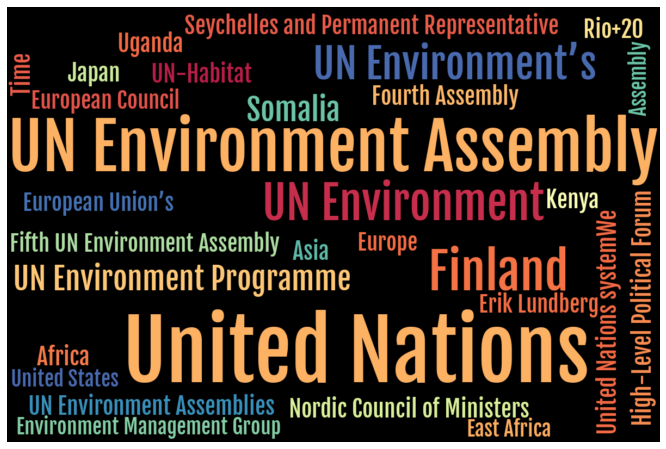

In [85]:
# visualize result
font=r"./fonts/Fjalla_One/FjallaOne-Regular.ttf"
fig,ax = plt.subplots(figsize=(12,8))

word_cloud = (wordcloud.WordCloud(width=1200,
                                  height=800,
                                  font_path=font,
                                  colormap='Spectral',
                                  relative_scaling=0.5,
                                 )
              .generate_from_frequencies(ent_dict))
ax.imshow(word_cloud,interpolation='bilinear')
ax.axis('off')

### Observe...
that a few of the items extracted as a PERSON were wrong, but then we got it right for most of the remaining text. This is good enough for our purpose, and also we can manually remove the wrong entry

In [24]:
description_map = {'GPE':'Geopolitical Entity eg country',
                   'LOC':'Location,place etc',
                   'ORG':'Organization',
                   'PERSON':'Any person as the word suggests'}
entity_df=pd.DataFrame(entities,columns=['entity','type'])
entity_df['description'] = entity_df['type'].map(description_map)
entity_df.head()

,entity,type,description
0,Erik Lundberg,PERSON,Any person as the word suggests
1,Finland,GPE,Geopolitical Entity eg country
2,Kenya,GPE,Geopolitical Entity eg country
3,Somalia,GPE,Geopolitical Entity eg country
4,Uganda,GPE,Geopolitical Entity eg country


### Conclusion
<hr>

This notebook illustrates the concept of named entity recognition in a simple use case. The detailed implementation can be more involving, and in some scenarious, you may want to train your own named entity recognizer if the pretrained model in the spacy engine is not enough. This is just a feel of NER. Go ahead and <a href='https://spacy.io/api/entityrecognizer'>explore more</a>